# Introduction au Reservoir Computing et à ReservoirPy

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

import reservoirpy as rpy
from reservoirpy.nodes import Reservoir, Ridge

## Un exemple simple: Mackey-Glass

<class 'numpy.ndarray'> (2000, 1)


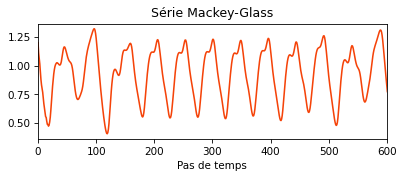

In [3]:
from reservoirpy.datasets import mackey_glass

timeseries = mackey_glass(n_timesteps=2_000, tau=17, seed=260_418)

print(type(timeseries), timeseries.shape)

plt.figure(figsize=(6, 2))
plt.title("Série Mackey-Glass")
plt.plot(timeseries)
plt.xlim(0, 600)
plt.xlabel("Pas de temps")
plt.show()

(1780, 1) (200, 1) (1780, 1) (200, 1)


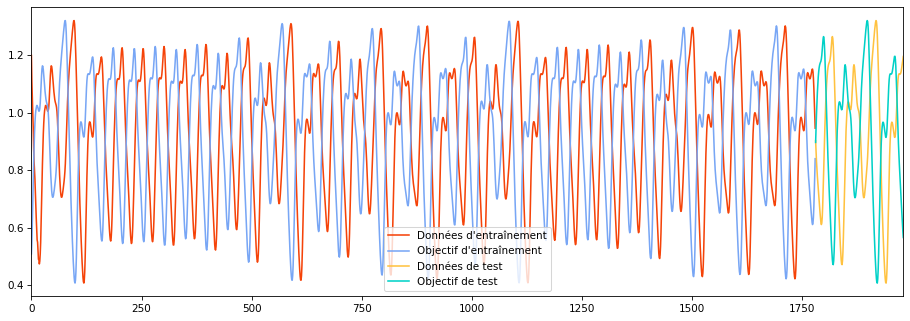

In [11]:
# Séparation X/Y et train/test
from reservoirpy.datasets import to_forecasting

X_train, X_test, Y_train, Y_test = to_forecasting(timeseries=timeseries, test_size=200, forecast=20)

print(
    X_train.shape,
    X_test.shape,
    Y_train.shape,
    Y_test.shape,
)
cutoff = X_train.shape[0]


plt.figure(figsize=(15, 5))
plt.plot(np.arange(0, 1780), X_train, label="Données d'entraînement")
plt.plot(np.arange(0, 1780), Y_train, label="Objectif d'entraînement")
plt.plot(np.arange(1780, 1980), X_test, label="Données de test")
plt.plot(np.arange(1780, 1980), Y_test, label="Objectif de test")
plt.legend()
plt.show()

In [12]:
# Créer le modèle
model = Reservoir(units=500, sr=1.25, lr=0.3) >> Ridge(ridge=1e-4)
# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, Y_train)
# Évaluer le modèle sur les données de test
Y_pred = model.run(X_test)

Running Model-1: 1780it [00:00, 3326.78it/s]<?, ?it/s]
Running Model-1: 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]


Fitting node Ridge-1...


Running Model-1: 200it [00:00, 3588.40it/s]           


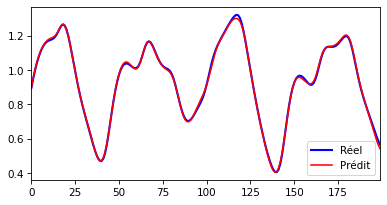

In [23]:
plt.figure(figsize=(6, 3))
plt.plot(Y_test, color="blue", linewidth=2, label="Réel")
plt.plot(Y_pred, color="red", label="Prédit")
plt.legend()
plt.show()

## Prédiction univariée (Consommation électrique sur le réseau français)

Lancé en 2011, [www.data.gouv.fr](www.data.gouv.fr) est un site gouvernemental français qui met à disposition plus de 45 000 jeux de données sous licence libre.

RTE (Réseau de Transport de l'Électricité) propose au grand public des informations historiques et [en temps réel](https://www.rte-france.com/eco2mix/la-consommation-delectricite-en-france) sur la consommation électrique sur le réseau en France.

Le jeu de données suivant, ainsi mis à disposition par RTE sur la plateforme [www.data.gouv.fr](www.data.gouv.fr), est une série temporelle qui présente la consommation électrique (en MW) du réseau par demi-heure, de 2012 à 2022.

Avec près de 200 000 pas de point, il peut être intéressant d'évaluer des tâches de prédiction à plusieurs échelles de temps (en rééchantillonnant, par exemple via `np.reshape` puis `np.mean`).

__Lien de téléchargement :__ https://www.data.gouv.fr/fr/datasets/consommation-quotidienne-brute/

In [37]:
import pandas as pd

# chargement du dataset
df_conso_rte = pd.read_csv('./datasets/conso_electricite_rte.csv')
# conversion de la colonne date_heure au bon type
df_conso_rte["date_heure"] = pd.to_datetime(df_conso_rte["date_heure"], utc=True)

df_conso_rte

,date_heure,consommation_brute_electricite_rte
0,2011-12-31 23:00:00+00:00,59610
1,2011-12-31 23:30:00+00:00,58314
2,2012-01-01 00:00:00+00:00,56230
3,2012-01-01 00:30:00+00:00,56075
4,2012-01-01 01:00:00+00:00,55531
...,...,...
192862,2022-12-31 22:00:00+00:00,47566
192863,2022-12-31 22:30:00+00:00,47690
192864,2022-12-31 23:00:00+00:00,47307
192865,2022-12-31 23:30:00+00:00,45648


In [38]:
# Pré-traitement: resampling, séparation train/test

In [39]:
# Création du modèle

In [ ]:
# Entraînement du modèle

In [ ]:
# Test du modèle

In [ ]:
# Évaluation des performances du modèle

## Classification de séries temporelles: FordA

On prend ici un jeu de données de classification :

Le problème de classification consiste à diagnostiquer si un certain symptôme existe ou non dans un sous-système automobile. Chaque cas se compose de 500 mesures du bruit du moteur et d'une classification.
http://timeseriesclassification.com/description.php?Dataset=FordA

In [26]:
import pickle

with open("./datasets/FordA.p", 'rb') as file:
    fordA = pickle.load(file)

print(
    type(fordA),
    fordA[0].shape, # X_train
    fordA[1].shape, # Y_train
    fordA[2].shape, # X_test
    fordA[3].shape, # Y_test
)

<class 'list'> (3601, 500, 1) (3601,) (1320, 500, 1) (1320,)


### Pré-traitement

Pour ReservoirPy, toutes les données sont des séries temporelles. Ce qui n'est pas le cas ici pour les données à prédire en classification. Réglons ça.

In [34]:
X_train = fordA[0]
Y_train = fordA[1]
X_test = fordA[2]
Y_test = fordA[3]

Y_train = np.repeat(Y_train.reshape(-1, 1, 1), 500, axis=1)
Y_test = np.repeat(Y_test.reshape(-1, 1, 1), 500, axis=1)

### Création d'un modèle et entraînement

In [ ]:
# Création du modèle

In [ ]:
# Entraîner le modèle à classifier


In [ ]:
# Lancer le modèle sur l'ensemble de test


In [ ]:
# Décoder les prédictions
# Il faut avoir 1 sortie par série !

In [ ]:
# Affichage des résultats (F1, accuracy, ...)
# N'oubliez pas Scikit-learn :)

### Exploration des hyper-paramètres

On pourra se référer à la seconde partie du [Tutoriel ReservoirPy sur la recherche d'hyper-paramètres](https://github.com/reservoirpy/reservoirpy/blob/master/tutorials/4-Understand_and_optimize_hyperparameters.ipynb) !

In [ ]:
# Définition de la fonction objectif

In [ ]:
# Configuration de la recherche

In [ ]:
# Lancement de la recherche

In [ ]:
# Affichage de l'exploration